In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [32]:
df2 = pd.read_csv('project_data.csv')

In [33]:
df2.shape

(1107069, 191)

In [34]:
df2.tail(5)

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
1107064,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,2017-11-05,0.979332,0.416013,0.020818,0.828199,0.003487,0.090743,0.005340,0.025139,...,NaN,NaN,0.006838,0.003680,0.000457,NaN,0.000905,0.001498,0.002774,0
1107065,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,2017-12-23,0.984907,0.296536,0.007209,0.812610,0.005904,0.079886,0.002243,0.023691,...,NaN,NaN,0.003310,0.007097,0.007857,NaN,0.002777,0.008225,0.008856,0
1107066,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,2018-01-06,0.983019,0.443984,0.013151,0.815422,0.003457,0.100503,0.002111,0.012343,...,NaN,NaN,0.009955,0.009994,0.001088,NaN,0.005693,0.006773,0.005566,0
1107067,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,2018-02-06,0.969861,0.442553,0.009855,1.003541,0.005117,0.101802,0.009930,0.008578,...,NaN,NaN,0.005541,0.006564,0.009883,NaN,0.008123,0.001168,0.003983,0
1107068,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,2018-03-14,0.982175,0.002474,0.000077,0.992880,0.000809,0.119165,0.003287,0.014092,...,NaN,NaN,0.007316,0.002888,0.006207,NaN,0.005110,0.003184,0.001914,0


In [138]:
mean_columns = [col for col in df2.columns if col not in ['customer_ID', 'S_2']]

import pandas as pd

# Convert the 'S_2' column to datetime
df2['S_2'] = pd.to_datetime(df2['S_2'])

# Define the last date in your data and calculate 6 months prior to this date
last_date = df2['S_2'].max()
six_months_ago = last_date - pd.DateOffset(months=6)

# Filter your data for the last 6 months
df2_last_6_months = df2[(df2['S_2'] > six_months_ago) & (df2['S_2'] <= last_date)]

# Calculate the average spend for each customer over the last 6 months
# Exclude 'customer_ID' and 'S_2' from the columns to calculate the mean
mean_columns = [col for col in df2.columns if col not in ['customer_ID', 'S_2']]
average_spend_last_6_months = df2_last_6_months.groupby('customer_ID')[mean_columns].mean()


In [139]:
average_spend_last_6_months

,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,...,D_133,R_28,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
customer_ID,,,,,,,,,,,,,,,,,,,,,
000098081fde4fd64bc4d503a5d6f86a0aedc425c96f5235f98b0f47c9d7d8d4,0.453994,0.008241,0.086502,0.209776,0.003453,0.321190,0.006587,0.191099,0.132745,0.065101,...,0.006162,0.004821,0.003118,0.003791,0.006505,NaN,0.004734,0.007456,0.006656,0.0
000445609ff2a39d2dd02484899affa5696210a95f6869f26390bd26eeb3b651,0.972001,0.004375,0.005635,0.814729,0.002568,0.177817,0.005849,0.008808,NaN,0.012655,...,0.004405,0.003082,0.005940,0.006145,0.005139,NaN,0.003638,0.004413,0.005228,0.0
0004837f0c785928a29a6f83f70f4a1c54caec483a773ff4b5b317ac251abda0,0.640140,0.476368,0.452852,0.052402,0.098913,0.308439,0.004986,0.277623,NaN,0.057510,...,0.006091,0.003555,0.007345,0.004203,0.003775,NaN,0.007226,0.006171,0.004154,0.0
0004ec03ca1ab2adb9aa260c61ba5dce8185e19d3ab704029f989240c733b6d0,0.970996,0.419345,0.046402,1.007475,0.088238,0.116979,0.006231,0.004915,NaN,0.045083,...,0.002978,0.005424,0.006773,0.004073,0.002906,NaN,0.004733,0.005382,0.005299,0.0
00050d84c6d26e26cd2b18c3eed83d3130c270e2361470ff272f9409103d067f,0.973982,0.239911,0.042363,0.608718,0.004490,0.021799,0.251329,0.004782,NaN,NaN,...,0.005864,0.007156,0.005771,0.004677,0.004723,NaN,0.004356,0.005417,0.006852,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffe2bc02423407e33a607660caeed076d713d8a5ad32321530e92704835da88,0.483217,0.303573,1.148299,0.149459,0.088788,1.136540,0.004397,0.210378,0.075905,0.287972,...,0.004924,0.003974,0.007121,0.006394,0.005724,NaN,0.007057,0.003951,0.006919,1.0
ffff518bb2075e4816ee3fe9f3b152c57fc0e6f01bf7fdd3e5b57cfcbee30286,0.854855,0.034576,0.323329,0.047433,0.005198,NaN,0.004366,0.249562,NaN,0.327520,...,1.128682,0.004400,0.005606,0.004334,0.005508,NaN,0.003623,0.005503,0.005631,0.0
ffff9984b999fccb2b6127635ed0736dda94e544e67e026eee4d20f680639ff6,0.795620,0.263486,0.019919,1.005072,0.004975,0.077636,0.003398,0.006543,NaN,0.075001,...,0.003725,0.005020,0.004410,0.004190,0.004195,NaN,0.007329,0.004483,0.003996,0.0


In [35]:
df2.head(5)

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
0,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,2017-03-11,0.374606,0.033519,0.044293,1.008622,0.001470,0.459235,0.002339,0.006168,...,NaN,NaN,0.008263,0.006609,0.007370,NaN,0.007171,0.005120,0.007513,0
1,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,2017-04-22,0.414269,0.002516,0.059667,0.123964,0.004374,0.434148,0.001405,0.052130,...,NaN,NaN,0.001986,0.004050,0.000796,NaN,0.001802,0.002364,0.003987,0
2,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,2017-05-12,0.413310,0.003285,0.053418,0.304955,0.002316,0.415906,0.009388,0.048780,...,NaN,NaN,0.009515,0.008757,0.009219,NaN,0.003134,0.001686,0.001265,0
3,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,2017-06-10,0.328983,0.038574,0.049463,0.115654,0.004654,0.416112,0.003223,0.081001,...,NaN,NaN,0.002524,0.007841,0.007421,NaN,0.000728,0.003591,0.007998,0
4,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,2017-07-19,0.496989,0.005552,0.041452,0.133631,0.007363,0.419864,0.003393,0.098308,...,NaN,NaN,0.003823,0.009599,0.006957,NaN,0.008746,0.007101,0.006658,0


In [36]:
missing_percent = (df2.isnull().sum() / len(df2)) * 100
missing_percent

customer_ID     0.000000
S_2             0.000000
P_2             0.824610
D_39            0.000000
B_1             0.000000
                 ...    
D_142          82.976400
D_143           1.810185
D_144           0.734010
D_145           1.810185
target          0.000000
Length: 191, dtype: float64

In [37]:
columns_to_drop = missing_percent[missing_percent > 95].index

In [38]:
df2.drop(columns=columns_to_drop, inplace=True)

In [39]:
import pandas as pd

# Assuming you have a DataFrame called df with 11 columns to encode

# Specify the columns to one-hot encode
columns_to_encode = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']

# Perform one-hot encoding
df = pd.get_dummies(df2, columns=columns_to_encode)

df.head()


,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_64_U,D_66_0.0,D_66_1.0,D_68_0.0,D_68_1.0,D_68_2.0,D_68_3.0,D_68_4.0,D_68_5.0,D_68_6.0
0,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,2017-03-11,0.374606,0.033519,0.044293,1.008622,0.001470,0.459235,0.002339,0.006168,...,0,0,0,0,0,0,0,0,0,0
1,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,2017-04-22,0.414269,0.002516,0.059667,0.123964,0.004374,0.434148,0.001405,0.052130,...,0,0,0,0,0,0,0,0,0,0
2,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,2017-05-12,0.413310,0.003285,0.053418,0.304955,0.002316,0.415906,0.009388,0.048780,...,0,0,0,0,0,1,0,0,0,0
3,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,2017-06-10,0.328983,0.038574,0.049463,0.115654,0.004654,0.416112,0.003223,0.081001,...,0,0,0,0,0,1,0,0,0,0
4,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,2017-07-19,0.496989,0.005552,0.041452,0.133631,0.007363,0.419864,0.003393,0.098308,...,0,0,0,0,0,1,0,0,0,0


In [40]:
# put 30% in test. This is a random split which is not ideal. Ideally we would like to split based on another variable, for example time. 
# Note that both test and train should be unbiased samples of the whole population.
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.3)

In [88]:
# check
train.shape

(774948, 212)

In [89]:
test1, test2 = train_test_split(test, test_size=0.5)

In [90]:
test1.shape

(166060, 212)

In [91]:
test2.shape

(166061, 212)

In [92]:
# check - it is a good practice to compare test and train samples to make sure they are not fundamentally different. 
# If so, we will get high variance even with a non-overfitted model.
# Here we compare bad rate in both samples.
print (sum(train["target"])/len(train["target"]))
print (sum(test1["target"])/len(test1["target"]))
print (sum(test2["target"])/len(test2["target"]))

0.2466655827229698
0.2458027219077442
0.24643353948247934


In [93]:
# Define X and Y varibales to build the ensemble model. 
X_train = train.drop(["customer_ID",'S_2', 'target'], axis = 1)
Y_train = train['target']

X_test1 = test1.drop(["customer_ID","S_2", 'target'], axis = 1)
Y_test1 = test1['target']
X_test2 = test2.drop(["customer_ID",'S_2','target'], axis = 1)
Y_test2 = test2['target']

In [94]:
print("X_test1 shape: ", X_test1.shape)
print("Y_test1 shape: ", Y_test1.shape)

X_test1 shape:  (166060, 209)
Y_test1 shape:  (166060,)


In [95]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)

StandardScaler()

In [96]:
X_train_normalized = sc.transform(X_train)
X_test1_normalized = sc.transform(X_test1)
X_test2_normalized = sc.transform(X_test2)

In [97]:
# convert to Pandas DF
X_train_normalized = pd.DataFrame(X_train_normalized, columns=X_train.columns)
X_test1_normalized = pd.DataFrame(X_test1_normalized, columns=X_test1.columns)
X_test2_normalized = pd.DataFrame(X_test2_normalized, columns=X_test2.columns)

In [98]:
X_train_normalized.describe(percentiles=[0.01, 0.99]).transpose()

,count,mean,std,min,1%,50%,99%,max
P_2,768542.0,7.100787e-16,1.000001,-4.392414,-2.680350,0.157195,1.426126,1.442553
D_39,774948.0,-2.798494e-17,1.000001,-0.566384,-0.565713,-0.532898,3.149231,19.266594
B_1,774948.0,1.067858e-16,1.000001,-9.240982,-0.582293,-0.437098,4.165410,5.669871
B_2,774694.0,-2.324951e-16,1.000001,-1.550587,-1.543372,0.479883,0.967053,0.967820
R_1,774948.0,-1.085616e-16,1.000001,-0.348627,-0.348118,-0.323179,4.098468,11.812756
...,...,...,...,...,...,...,...,...
D_68_2.0,774948.0,4.289756e-15,1.000001,-0.203014,-0.203014,-0.203014,4.925767,4.925767
D_68_3.0,774948.0,-6.012543e-15,1.000001,-0.309452,-0.309452,-0.309452,3.231523,3.231523
D_68_4.0,774948.0,-2.288557e-15,1.000001,-0.306002,-0.306002,-0.306002,3.267954,3.267954
D_68_5.0,774948.0,-3.515922e-15,1.000001,-0.525937,-0.525937,-0.525937,1.901369,1.901369


In [108]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Define a function to cap and floor values
def cap_floor_values(df, lower_percentile, upper_percentile):
    for col in df.columns:
        lower_value = df[col].quantile(lower_percentile)
        upper_value = df[col].quantile(upper_percentile)
        df[col] = np.where(df[col] < lower_value, lower_value, df[col])
        df[col] = np.where(df[col] > upper_value, upper_value, df[col])
    return df

# Apply cap and floor on train set
X_train_normalized = cap_floor_values(X_train, 0.01, 0.99)

# Replace missing values with 0 in train set
X_train_normalized = X_train_normalized.fillna(0)

# Initialize the scaler based on the train set (after capping/flooring and filling NA)
scaler = StandardScaler().fit(X_train_normalized)

# Standardize the train set
X_train_normalized = scaler.transform(X_train_normalized)

# Apply the same transformations to the test sets
X_test1_normalized = cap_floor_values(X_test1, 0.01, 0.99)
X_test1_normalized = X_test1_normalized.fillna(0)
X_test1_normalized = scaler.transform(X_test1_normalized)

X_test2_normalized = cap_floor_values(X_test2, 0.01, 0.99)
X_test2_normalized = X_test2_normalized.fillna(0)
X_test2_normalized = scaler.transform(X_test2_normalized)


In [109]:
X_train_normalized = pd.DataFrame(X_train_normalized, columns=X_train.columns)
X_test1_normalized = pd.DataFrame(X_test1_normalized, columns=X_test1.columns)
X_test2_normalized = pd.DataFrame(X_test2_normalized, columns=X_test2.columns)

In [110]:
X_train_normalized.describe(percentiles=[0.01, 0.99]).transpose()

,count,mean,std,min,1%,50%,99%,max
P_2,774948.0,-1.039045e-15,1.000001,-2.621684,-2.618359,0.160802,1.423277,1.423383
D_39,774948.0,1.452699e-18,1.000001,-0.627908,-0.627908,-0.589851,3.680552,3.680635
B_1,774948.0,1.114117e-16,1.000001,-0.597681,-0.597681,-0.446658,4.340539,4.340553
B_2,774948.0,-1.038364e-15,1.000001,-1.549845,-1.542632,0.480265,0.967364,0.967364
R_1,774948.0,-7.422439e-17,1.000001,-0.368179,-0.368179,-0.340353,4.593118,4.593120
...,...,...,...,...,...,...,...,...
D_68_2.0,774948.0,4.289756e-15,1.000001,-0.203014,-0.203014,-0.203014,4.925767,4.925767
D_68_3.0,774948.0,-6.012543e-15,1.000001,-0.309452,-0.309452,-0.309452,3.231523,3.231523
D_68_4.0,774948.0,-2.288557e-15,1.000001,-0.306002,-0.306002,-0.306002,3.267954,3.267954
D_68_5.0,774948.0,-3.515922e-15,1.000001,-0.525937,-0.525937,-0.525937,1.901369,1.901369


In [111]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [112]:
import xgboost as xgb

In [113]:
xgb_instance = xgb.XGBClassifier()

In [114]:
xgb_instance = xgb.XGBClassifier() # nothing inside paranthesis, meaning we are using default parameters, with 100 trees.

model_for_feature_selection = xgb_instance.fit(X_train_normalized,Y_train)
model_for_feature_selection

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [115]:
feature_importance = {'Feature':X_train_normalized.columns,'Importance':model_for_feature_selection.feature_importances_}
feature_importance = pd.DataFrame(feature_importance)
feature_importance.sort_values("Importance", inplace=True,ascending=False)
feature_importance

,Feature,Importance
0,P_2,0.235825
2,B_1,0.059325
24,B_9,0.038205
10,D_44,0.028685
4,R_1,0.025066
...,...,...
172,B_38_6.0,0.000000
177,D_116_1.0,0.000000
164,B_30_0.0,0.000000
165,B_30_1.0,0.000000


In [116]:
# choose featires with FI higher than 0.5%
final_features = feature_importance["Feature"][feature_importance.Importance > 0.005]

X1_train = X_train_normalized[final_features]
X1_test1 = X_test1_normalized[final_features]
X1_test2 = X_test2_normalized[final_features]
final_features

0           P_2
2           B_1
24          B_9
10         D_44
4           R_1
3           B_2
7           B_3
5           S_3
8          D_42
23         D_51
197      D_64_O
20          B_7
28         B_10
12         D_45
17         D_48
9          D_43
25          R_3
6          D_41
15         D_46
18         D_49
134        R_27
168    B_38_2.0
14          R_2
27          P_3
201    D_66_1.0
74         D_77
169    B_38_3.0
1          D_39
136       D_112
70         D_75
13          B_5
78         D_79
11          B_4
133        R_26
121        S_23
Name: Feature, dtype: object

In [117]:
model = xgb.XGBRegressor(n_estimators=300, learning_rate=0.5, max_depth=4, subsample=0.5, colsample_bytree=0.5, scale_pos_weight=5)
model.fit(X_train_normalized, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.5, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=300, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [118]:
##feature_importance = model.feature_importances_

s_feature_importance = {'Feature':X_train_normalized.columns,'Importance':model.feature_importances_}
s_feature_importance = pd.DataFrame(s_feature_importance)
s_feature_importance.sort_values("Importance", inplace=True,ascending=False)
s_feature_importance

,Feature,Importance
20,B_7,0.198731
68,P_4,0.108529
24,B_9,0.065160
10,D_44,0.052260
74,D_77,0.036635
...,...,...
195,D_63_XZ,0.000000
194,D_63_XM,0.000000
193,D_63_XL,0.000000
181,D_117_3.0,0.000000


In [119]:
final_features_1 = s_feature_importance["Feature"][s_feature_importance.Importance > 0.005]

X2_train = X_train_normalized[final_features_1]
X2_test1 = X_test1_normalized[final_features_1]
X2_test2 = X_test2_normalized[final_features_1]
final_features_1


20          B_7
68          P_4
24          B_9
10         D_44
74         D_77
47         D_61
21          B_8
3           B_2
8          D_42
26         D_52
136       D_112
35          S_7
7           B_3
5           S_3
9          D_43
2           B_1
0           P_2
201    D_66_1.0
191     D_63_CO
13          B_5
4           R_1
18         D_49
197      D_64_O
150       D_129
65         D_72
Name: Feature, dtype: object

In [120]:
merged_feature_importance = pd.concat([feature_importance, s_feature_importance], ignore_index=True)

# Group by 'Feature' and calculate the maximum importance across both models
max_importance = merged_feature_importance.groupby('Feature')['Importance'].max().reset_index()

# Filter features that have importance greater than 0.5% in either of the two models
filtered_features = max_importance[max_importance['Importance'] > 0.005]['Feature']

X3_train = X_train_normalized[filtered_features]
X3_test1 = X_test1_normalized[filtered_features]
X3_test2 = X_test2_normalized[filtered_features]


In [121]:
pip install tensorflow


In [122]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [123]:
import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

In [130]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import roc_auc_score

def create_model(num_hidden_layers, num_nodes, activation_fn, dropout_rate):
    model = Sequential()
    model.add(Dense(num_nodes, input_dim=X3_train.shape[1], activation=activation_fn))  # first layer needs input dimension

    for _ in range(num_hidden_layers - 1):
        model.add(Dense(num_nodes, activation=activation_fn))
        if dropout_rate < 1.0:
            model.add(Dropout(1-dropout_rate))  # Dropout rate in keras is the fraction to drop

    model.add(Dense(units=1, activation='sigmoid'))  # Output layer

    optimizer = Adam()
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['AUC'])

    return model

# empty list to hold results
results = []

# grid search parameters
num_layers = [2, 4]
num_nodes = [4, 6]
activations = ['relu', 'tanh']
dropout_rates = [0.5, 1.0]
batch_sizes = [100, 10000]
epochs = 20

for layers in num_layers:
    for nodes in num_nodes:
        for activation in activations:
            for dropout_rate in dropout_rates:
                for batch_size in batch_sizes:
                    model = create_model(layers, nodes, activation, dropout_rate)
                    history = model.fit(X3_train, Y_train, epochs=epochs, batch_size=batch_size, verbose=0)

                    # predict probabilities for train set
                    train_probs = model.predict(X3_train).ravel()

                    # compute AUC for train set
                    train_auc = roc_auc_score(Y_train, train_probs)

                    # predict probabilities for test1
                    test1_probs = model.predict(X3_test1).ravel()

                    # compute AUC for test1
                    test1_auc = roc_auc_score(Y_test1, test1_probs)

                    # predict probabilities for test2
                    test2_probs = model.predict(X3_test2).ravel()

                    # compute AUC for test2
                    test2_auc = roc_auc_score(Y_test2, test2_probs)

                    # save the results
                    results.append({
                        'num_layers': layers,
                        'num_nodes': nodes,
                        'activation': activation,
                        'dropout_rate': dropout_rate,
                        'batch_size': batch_size,
                        'train_auc': train_auc,
                        'test1_auc': test1_auc,
                        'test2_auc': test2_auc
                    })

# convert results to a DataFrame
results_df = pd.DataFrame(results)


5190/5190 [==============================] - 3s 511us/step


In [131]:
results_df

,num_layers,num_nodes,activation,dropout_rate,batch_size,train_auc,test1_auc,test2_auc
0,2,4,relu,0.5,100,0.933238,0.932228,0.931628
1,2,4,relu,0.5,10000,0.931485,0.930696,0.929928
2,2,4,relu,1.0,100,0.933027,0.932151,0.931209
3,2,4,relu,1.0,10000,0.927802,0.927055,0.925816
4,2,4,tanh,0.5,100,0.933105,0.932254,0.931317
5,2,4,tanh,0.5,10000,0.930819,0.930104,0.929394
6,2,4,tanh,1.0,100,0.933194,0.932147,0.931482
7,2,4,tanh,1.0,10000,0.931271,0.930734,0.929966
8,2,6,relu,0.5,100,0.934354,0.933214,0.932696
9,2,6,relu,0.5,10000,0.931611,0.930745,0.930120


In [133]:
# Define the thresholds
train_threshold = 0.85
difference_threshold = 0.05

# Initialize the best_auc as 0
best_auc = 0
# Initialize the best model as None
best_model = None

# Loop through each row in the dataframe
for index, row in results_df.iterrows():
    # Calculate the maximum difference between train AUC and test AUCs
    max_difference = max(abs(row['train_auc'] - row['test1_auc']), abs(row['train_auc'] - row['test2_auc']))
    
    # Check if the model has low bias (AUC Train > train_threshold) and low variance (max_difference < difference_threshold)
    if row['train_auc'] > train_threshold and max_difference < difference_threshold:
        # Check if this model has a higher average AUC score on the test sets than the current best model
        average_test_auc = (row['test1_auc'] + row['test2_auc']) / 2
        if average_test_auc > best_auc:
            # Update the best_auc and best_model
            best_auc = average_test_auc
            best_model = row

# Print the parameters of the best model
if best_model is not None:
    print(best_model)
else:
    print("No model found that satisfies the given conditions.")


num_layers             4
num_nodes              6
activation          relu
dropout_rate         1.0
batch_size           100
train_auc       0.934692
test1_auc       0.933476
test2_auc       0.932997
Name: 26, dtype: object


In [136]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam


# Create the model with the optimal parameters
model = Sequential()
model.add(Dense(6, input_dim=X3_train.shape[1], activation='relu'))

for _ in range(4 - 1):  # subtract 1 because we already added the first layer
    model.add(Dense(6, activation='relu'))
    model.add(Dropout(0.0))

model.add(Dense(1, activation='sigmoid'))

# Compile the model
optimizer = Adam()
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['AUC'])

# Fit the model
model.fit(X3_train, Y_train, epochs=20, batch_size=100, verbose=1)

# Save the model
model.save('final_model.h5')


Epoch 1/20
7750/7750 [==============================] - 6s 721us/step - loss: 0.2899 - auc: 0.9273
Epoch 2/20
7750/7750 [==============================] - 6s 719us/step - loss: 0.2790 - auc: 0.9329
Epoch 3/20
7750/7750 [==============================] - 6s 779us/step - loss: 0.2781 - auc: 0.9334
Epoch 4/20
7750/7750 [==============================] - 6s 815us/step - loss: 0.2777 - auc: 0.9336
Epoch 5/20
7750/7750 [==============================] - 6s 823us/step - loss: 0.2776 - auc: 0.9337
Epoch 6/20
7750/7750 [==============================] - 6s 822us/step - loss: 0.2774 - auc: 0.9338
Epoch 7/20
7750/7750 [==============================] - 6s 819us/step - loss: 0.2773 - auc: 0.9338
Epoch 8/20
7750/7750 [==============================] - 6s 823us/step - loss: 0.2772 - auc: 0.9339
Epoch 9/20
7750/7750 [==============================] - 6s 820us/step - loss: 0.2771 - auc: 0.9339
Epoch 10/20
7750/7750 [==============================] - 6s 819us/step - loss: 0.2770 - auc: 0.9340
Epoch 11/

C:\Users\prana\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


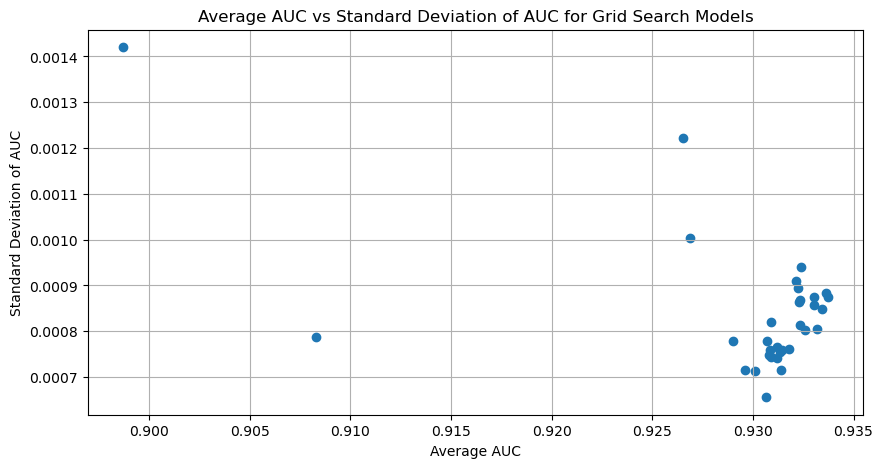

In [142]:
import matplotlib.pyplot as plt
# Calculate average and standard deviation of AUCs
results_df['Average AUC'] = results_df[['train_auc', 'test1_auc', 'test2_auc']].mean(axis=1)
results_df['Standard Deviation AUC'] = results_df[['train_auc', 'test1_auc', 'test2_auc']].std(axis=1)

# Create scatter plot (Average AUC vs Standard Deviation of AUC)
plt.figure(figsize=(10, 5))
plt.scatter(results_df['Average AUC'], results_df['Standard Deviation AUC'])
plt.xlabel('Average AUC')
plt.ylabel('Standard Deviation of AUC')
plt.title('Average AUC vs Standard Deviation of AUC for Grid Search Models')
plt.grid(True)
plt.show()


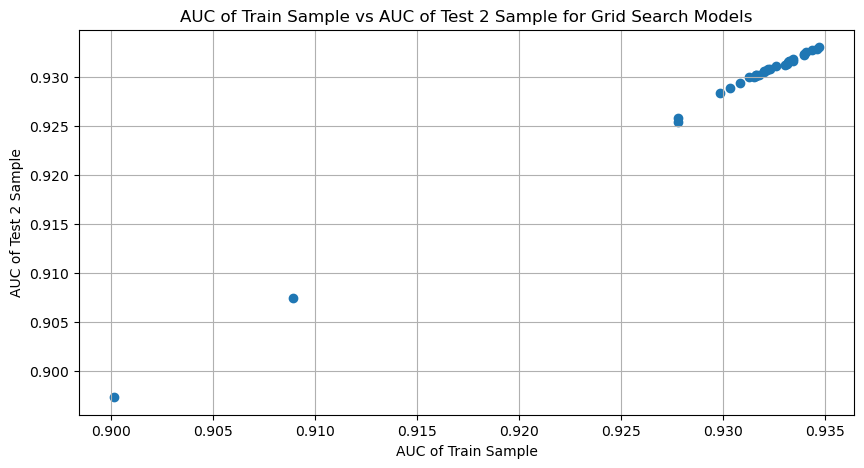

In [143]:
# Create scatter plot (AUC of train sample vs AUC of Test 2 sample)
plt.figure(figsize=(10, 5))
plt.scatter(results_df['train_auc'], results_df['test2_auc'])
plt.xlabel('AUC of Train Sample')
plt.ylabel('AUC of Test 2 Sample')
plt.title('AUC of Train Sample vs AUC of Test 2 Sample for Grid Search Models')
plt.grid(True)
plt.show()


5190/5190 [==============================] - 3s 496us/step


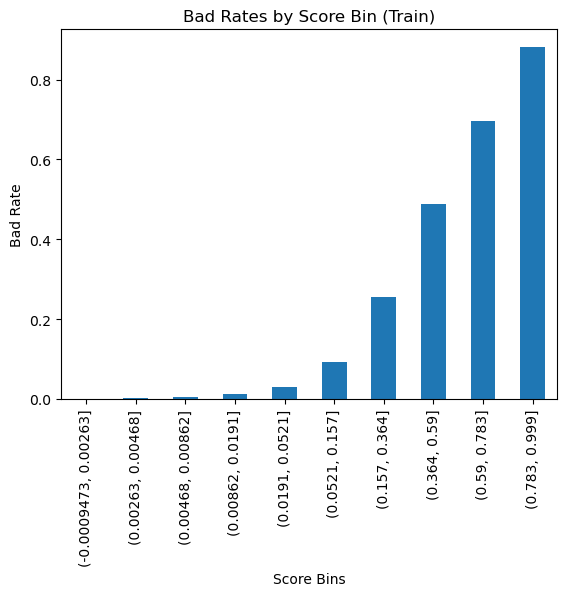

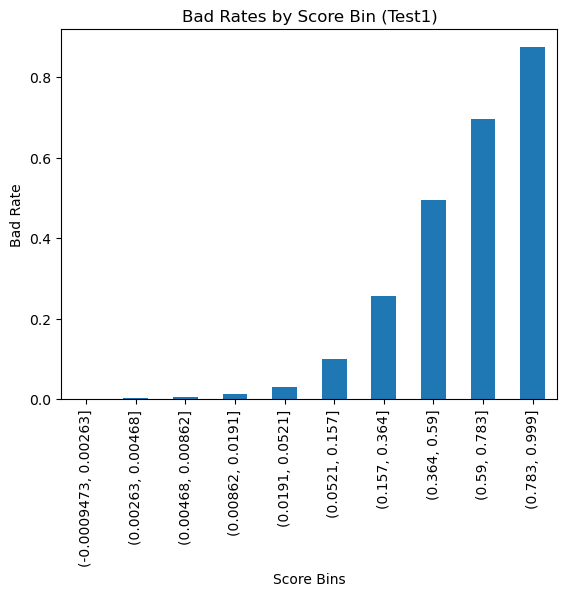

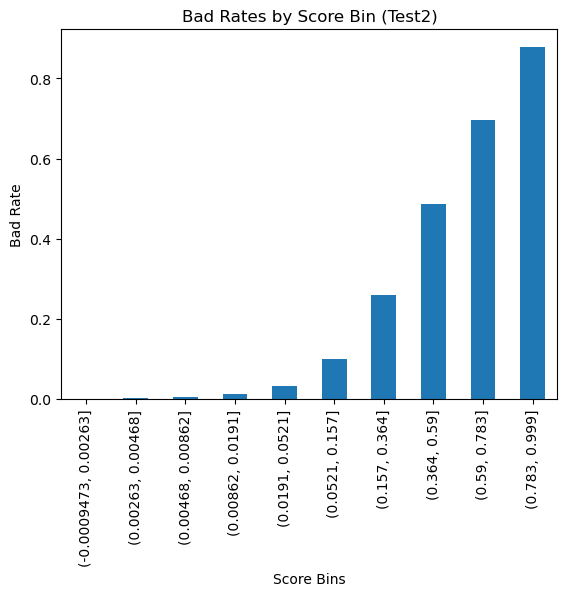

In [148]:
import matplotlib.pyplot as plt

# Compute predicted probabilities
Y_train_pred = model.predict(X3_train)
Y_test1_pred = model.predict(X3_test1)
Y_test2_pred = model.predict(X3_test2)

# Create score bins based on train sample predictions
quantiles = pd.qcut(Y_train_pred.flatten(), q=10, precision=3, retbins=True, duplicates='drop')[1]

# Function to compute bad rates and plot bar chart
def compute_bad_rates_and_plot(y_true, y_pred, quantiles, set_name):
    df = pd.DataFrame({"Actual": y_true, "Prediction": y_pred.flatten()})
    df["Score Bins"] = pd.cut(df["Prediction"], bins=quantiles, include_lowest=True)
    stat = df.groupby("Score Bins")["Actual"].mean()

    stat.plot(kind='bar', title=f'Bad Rates by Score Bin ({set_name})')
    plt.ylabel('Bad Rate')
    plt.show()

# Compute bad rates and plot bar chart for each set
compute_bad_rates_and_plot(Y_train, Y_train_pred, quantiles, 'Train')
compute_bad_rates_and_plot(Y_test1, Y_test1_pred, quantiles, 'Test1')
compute_bad_rates_and_plot(Y_test2, Y_test2_pred, quantiles, 'Test2')


In [157]:
def compute_bad_rates(y_true, y_pred, quantiles):
    # Create a DataFrame with the actual outcomes and predicted probabilities
    df = pd.DataFrame({'Actual': y_true, 'Prediction': y_pred.flatten()})

    # Apply the score bins to the DataFrame
    df['Score Bin'] = pd.cut(df['Prediction'], bins=quantiles, include_lowest=True)

    # Compute the bad rates in each bin
    df['Bad Rate'] = df.groupby('Score Bin')['Actual'].transform('mean')

    return df.drop_duplicates('Score Bin')

# Compute bad rates for each set
rank_order_train = compute_bad_rates(Y_train, Y_train_pred, quantiles)
rank_order_test1 = compute_bad_rates(Y_test1, Y_test1_pred, quantiles)
rank_order_test2 = compute_bad_rates(Y_test2, Y_test2_pred, quantiles)

print('Train Rank Ordering:')
print(rank_order_train)

Train Rank Ordering:
         Actual  Prediction              Score Bin  Bad Rate
725213        0    0.434098          (0.364, 0.59]  0.489567
889186        1    0.967181         (0.783, 0.999]  0.881283
1049987       0    0.007426     (0.00468, 0.00862]  0.005265
222281        0    0.330062         (0.157, 0.364]  0.255800
73051         0    0.119882        (0.0521, 0.157]  0.093374
781152        0    0.000926  (-0.0009473, 0.00263]  0.001032
608958        0    0.017682      (0.00862, 0.0191]  0.011949
6475          0    0.019878       (0.0191, 0.0521]  0.030325
665236        0    0.002656     (0.00263, 0.00468]  0.002710
697527        1    0.610802          (0.59, 0.783]  0.695348


In [158]:
# Compute predicted probabilities for Neural Network
Y_train_pred_nn = model.predict(X3_train)

# Create DataFrame with actual and predicted values
perf_train_data_nn = pd.DataFrame({"Actual": Y_train, "Prediction": Y_train_pred_nn.flatten()})

# Define score bins based on the quantiles of predictions
quantiles_nn = list(set(perf_train_data_nn.Prediction.quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])))
quantiles_nn.sort()
quantiles_nn.insert(0,0)
quantiles_nn.insert(len(quantiles_nn),1)

# Apply score bins to the DataFrame
perf_train_data_nn["Score Bins"] = pd.cut(perf_train_data_nn["Prediction"], quantiles_nn)

# Compute "Bad Rate" (default rate) in each bin
stat_nn = perf_train_data_nn.groupby("Score Bins")["Actual"].agg(["sum", "count"])
stat_nn["Bad Rate"] = stat_nn["sum"] / stat_nn["count"]

# Print "Bad Rate" for each score bin
print(stat_nn)


24218/24218 [==============================] - 12s 501us/step
                      sum  count  Bad Rate
Score Bins                                
(0.0, 0.00263]         80  77495  0.001032
(0.00263, 0.00468]    210  77495  0.002710
(0.00468, 0.00862]    408  77495  0.005265
(0.00862, 0.0191]     926  77494  0.011949
(0.0191, 0.0521]     2350  77495  0.030325
(0.0521, 0.157]      7236  77495  0.093374
(0.157, 0.364]      19823  77494  0.255800
(0.364, 0.59]       37939  77495  0.489567
(0.59, 0.783]       53886  77495  0.695348
(0.783, 1.0]        68295  77495  0.881283


In [160]:
stat_nn = stat_nn.reset_index()


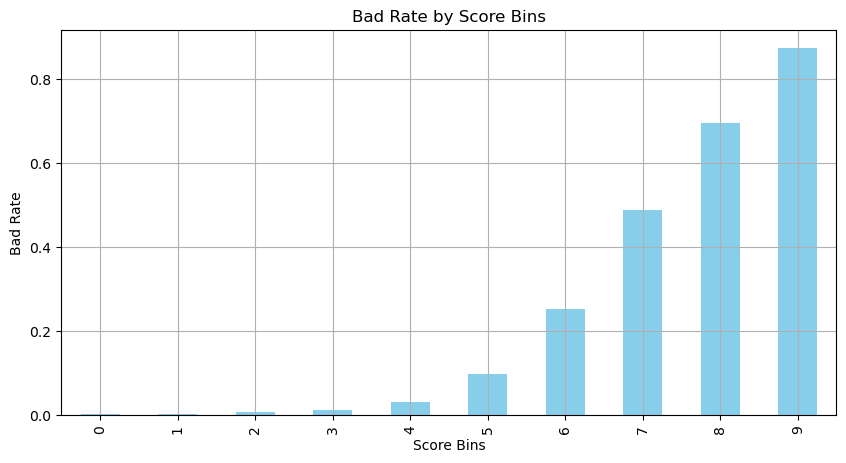

In [161]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 5))
stat_nn['Bad Rate'].plot(kind='bar', color='skyblue')
plt.xlabel('Score Bins')
plt.ylabel('Bad Rate')
plt.title('Bad Rate by Score Bins')
plt.grid(True)
plt.show()


In [159]:
# Compute predicted probabilities for Neural Network
Y_train_pred_nn = model.predict(X3_test1)

# Create DataFrame with actual and predicted values
perf_train_data_nn = pd.DataFrame({"Actual": Y_test1, "Prediction": Y_train_pred_nn.flatten()})

# Define score bins based on the quantiles of predictions
quantiles_nn = list(set(perf_train_data_nn.Prediction.quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])))
quantiles_nn.sort()
quantiles_nn.insert(0,0)
quantiles_nn.insert(len(quantiles_nn),1)

# Apply score bins to the DataFrame
perf_train_data_nn["Score Bins"] = pd.cut(perf_train_data_nn["Prediction"], quantiles_nn)

# Compute "Bad Rate" (default rate) in each bin
stat_nn = perf_train_data_nn.groupby("Score Bins")["Actual"].agg(["sum", "count"])
stat_nn["Bad Rate"] = stat_nn["sum"] / stat_nn["count"]

# Print "Bad Rate" for each score bin
print(stat_nn)


5190/5190 [==============================] - 3s 512us/step
                      sum  count  Bad Rate
Score Bins                                
(0.0, 0.00261]         24  16606  0.001445
(0.00261, 0.00461]     42  16606  0.002529
(0.00461, 0.00854]     99  16606  0.005962
(0.00854, 0.0187]     200  16606  0.012044
(0.0187, 0.0512]      508  16606  0.030591
(0.0512, 0.154]      1604  16606  0.096592
(0.154, 0.359]       4172  16606  0.251234
(0.359, 0.587]       8121  16606  0.489040
(0.587, 0.782]      11534  16606  0.694568
(0.782, 1.0]        14514  16606  0.874021


In [ ]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 5))
stat_nn['Bad Rate'].plot(kind='bar', color='skyblue')
plt.xlabel('Score Bins')
plt.ylabel('Bad Rate')
plt.title('Bad Rate by Score Bins')
plt.grid(True)
plt.show()
